# HOG

In [ ]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.utils import np_utils

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier



In [ ]:
# Tải dữ liệu
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# Kích thước dữ liệu
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


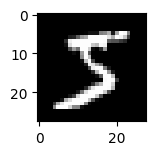

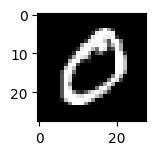

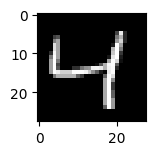

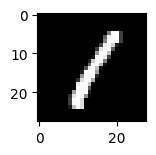

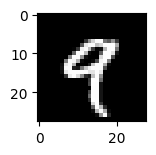

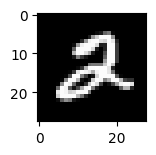

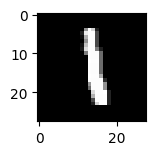

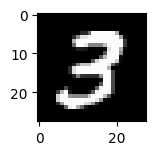

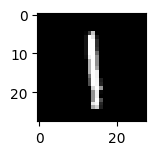

In [ ]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# labels encoder
num_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000,)

In [ ]:
# Chuẩn hóa ảnh
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
# Hàm trích xuất HOG features
def calc_hog_features(X, image_shape=(28, 28), pixels_per_cell=(8, 8)):
    fd_list = []
    for row in X:
        img = row.reshape(image_shape)
        fd = hog(img, orientations=8, pixels_per_cell=pixels_per_cell, cells_per_block=(1, 1))
        fd_list.append(fd)
    
    return np.array(fd_list)

In [ ]:
X_train = calc_hog_features(X_train, pixels_per_cell=(8, 8))
X_test = calc_hog_features(X_test, pixels_per_cell=(8, 8))

In [ ]:
# Mô hình
model = Sequential()
model.add(Dense(100, input_dim=72, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20,
                    batch_size=5, verbose=1)

Epoch 1/20
12000/12000 [==============================] - 20s 2ms/step - loss: 0.4016 - accuracy: 0.8702
Epoch 2/20
12000/12000 [==============================] - 20s 2ms/step - loss: 0.2727 - accuracy: 0.9121
Epoch 3/20
12000/12000 [==============================] - 20s 2ms/step - loss: 0.2525 - accuracy: 0.9194
Epoch 4/20
12000/12000 [==============================] - 21s 2ms/step - loss: 0.2362 - accuracy: 0.9256
Epoch 5/20
12000/12000 [==============================] - 20s 2ms/step - loss: 0.2240 - accuracy: 0.9261
Epoch 6/20
12000/12000 [==============================] - 19s 2ms/step - loss: 0.2193 - accuracy: 0.9304
Epoch 7/20
12000/12000 [==============================] - 20s 2ms/step - loss: 0.2136 - accuracy: 0.9311
Epoch 8/20
12000/12000 [==============================] - 20s 2ms/step - loss: 0.2078 - accuracy: 0.9342
Epoch 9/20
12000/12000 [==============================] - 19s 2ms/step - loss: 0.2057 - accuracy: 0.9337
Epoch 10/20
12000/12000 [==============================

In [ ]:
y_pred = model.predict(X_test)
classes_x = np.argmax(y_pred,axis=1)

313/313 [==============================] - 0s 930us/step


In [ ]:
classes_x[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

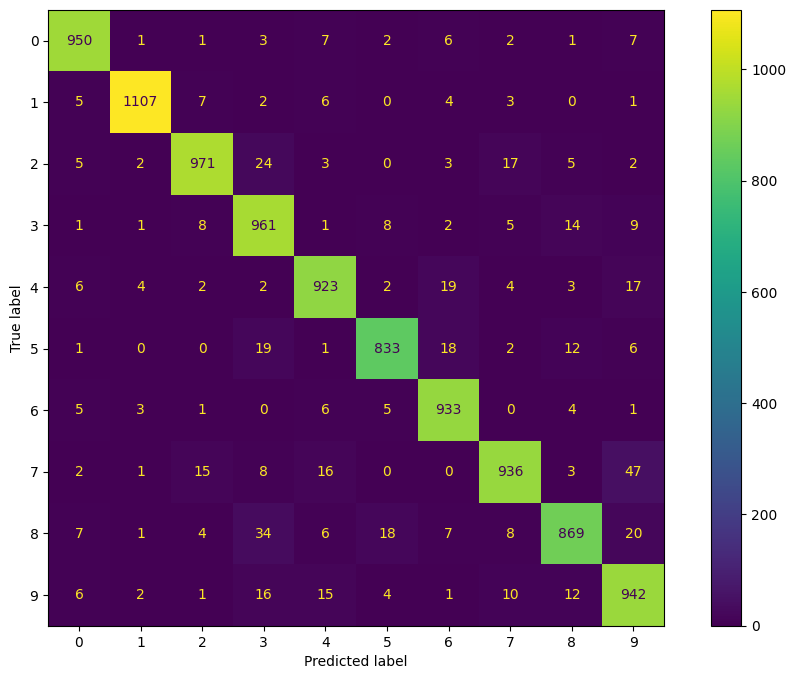

In [ ]:
# Vẽ confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
cm = confusion_matrix(y_test, classes_x)
cmp = ConfusionMatrixDisplay(cm)
cmp.plot(ax=ax)

plt.show()

In [ ]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.90      0.95      0.92      1010
           4       0.94      0.94      0.94       982
           5       0.96      0.93      0.94       892
           6       0.94      0.97      0.96       958
           7       0.95      0.91      0.93      1028
           8       0.94      0.89      0.92       974
           9       0.90      0.93      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



# HOG 2

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from skimage.feature import hog
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout


## Prepare Data

In [ ]:
# Tải dữ liệu
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# Kích thước dữ liệu
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('Y_test:  ' + str(y_test.shape))

11490434/11490434 [==============================] - 1s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


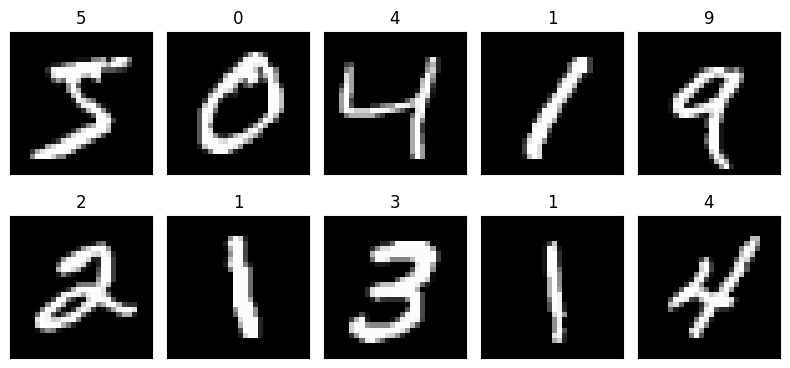

In [ ]:
fix, axis = plt.subplots(2, 5, figsize = (8, 4), subplot_kw = {'xticks': [], 'yticks': []})

for i, ax in enumerate(axis.flat):
  ax.imshow(X_train[i], cmap = 'gray', )
  ax.set_title(y_train[i])
plt.tight_layout()
plt.show()


In [ ]:
# Chuẩn hóa ảnh
X_train = X_train/255.0
X_test = X_test/255.0

## Extract HOG features

In [ ]:
# Hàm trích xuất HOG features
def calc_hog_features(X, image_shape=(28, 28), pixels_per_cell=(4, 4)): # pixels_per_cell: 8 => 4 để tăng biến cho Histogram
    fd_list = []                                                    # Có thể chọn 4 hoặc 7 để 28 chia đc hết, tránh mất dữ liệu biên bên phải
    for row in X:
        img = row.reshape(image_shape)
        fd = hog(img, orientations=8, pixels_per_cell=pixels_per_cell, cells_per_block=(2, 2)) # cells_per_block: 1 => 2 giúp tăng 
        fd_list.append(fd)                                                                     # khả năng Chuẩn hóa véc tơ histogram
    
    return np.array(fd_list)

In [ ]:
X_train_hog = calc_hog_features(X_train)
X_test_hog = calc_hog_features(X_test)

In [ ]:
X_test_hog.shape

(10000, 1152)

## Training

In [ ]:
num_classes = 10
input_dim = X_train_hog.shape[1]

# Mô hình
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu')) # để 128 với 64 hoặc số nào đó = 2^x để đồng bộ với 
model.add(Dropout(0.2))                                       # tính chất của máy tính (thực nghiệm thấy tốt hơn 1 chút)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_hog, y_train, epochs=20,
                    batch_size=512, verbose=1) # Tăng Batchsize => 512 để train nhanh hơn (tuỳ thuộc vào khả năng của CPU / GPU)

Epoch 1/20
118/118 [==============================] - 2s 6ms/step - loss: 0.5011 - accuracy: 0.8628
Epoch 2/20
118/118 [==============================] - 1s 6ms/step - loss: 0.1267 - accuracy: 0.9624
Epoch 3/20
118/118 [==============================] - 1s 4ms/step - loss: 0.0983 - accuracy: 0.9700
Epoch 4/20
118/118 [==============================] - 1s 5ms/step - loss: 0.0812 - accuracy: 0.9746
Epoch 5/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0696 - accuracy: 0.9786
Epoch 6/20
118/118 [==============================] - 1s 7ms/step - loss: 0.0627 - accuracy: 0.9811
Epoch 7/20
118/118 [==============================] - 1s 7ms/step - loss: 0.0556 - accuracy: 0.9830
Epoch 8/20
118/118 [==============================] - 1s 7ms/step - loss: 0.0492 - accuracy: 0.9850
Epoch 9/20
118/118 [==============================] - 1s 5ms/step - loss: 0.0445 - accuracy: 0.9856
Epoch 10/20
118/118 [==============================] - 1s 4ms/step - loss: 0.0390 - accuracy: 0.9880

In [ ]:
y_pred = model.predict(X_test_hog)
classes_x = np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
classes_x[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Confusion Maxtrix

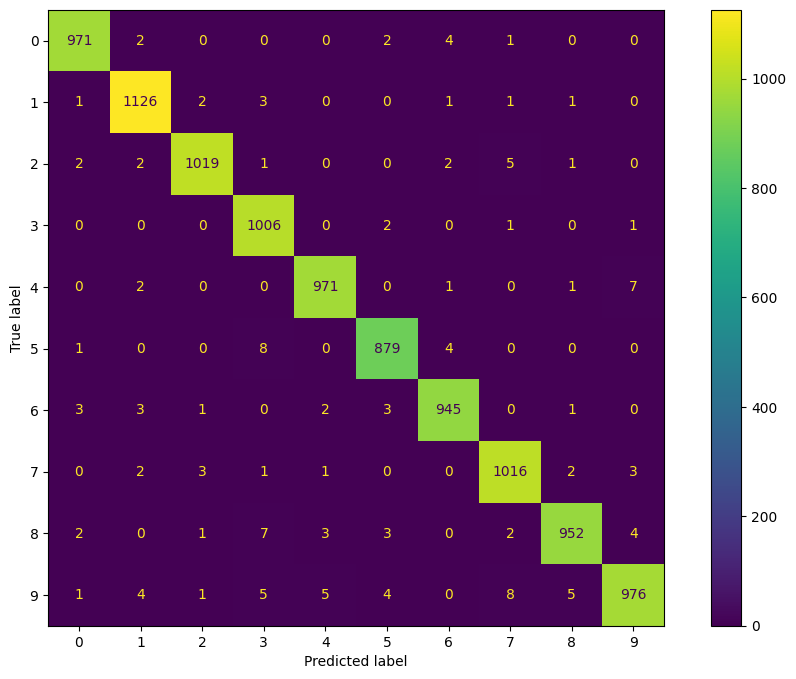

In [ ]:
# Vẽ confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
cm = confusion_matrix(y_test, classes_x)
cmp = ConfusionMatrixDisplay(cm)
cmp.plot(ax=ax)

plt.show()

# SIFT

In [ ]:
import os 
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score


In [ ]:
##Downloading and unpacking the dataset
get_ipython().system('wget https://github.com/myleott/mnist_png/raw/master/mnist_png.tar.gz')
get_ipython().system('tar -xf mnist_png.tar.gz')

##Combining the train and test data
get_ipython().system('cp -r /content/mnist_png/testing/* /content/mnist_png/training/')
get_ipython().system('rm -rf /content/mnist_png/testing /content/mnist_png.tar.gz')

### Thresh = 15, k = 150, 250, 350:

In [ ]:
path = '/content/mnist_png/training'
image_path = []
for i in range(10):
  dir = os.path.join(path, str(i))
  for file in os.listdir(dir):
    image_path.append(os.path.join(dir, file))

thresh = 15

def CalcFeatures(img, th):
  sift = cv2.SIFT_create(th)
  kp, des = sift.detectAndCompute(img, None)
  return des   # shape = (1 => 18, 128)
  

  # Tất cả các tệp được thêm vào danh sách image_path được chuyển qua các hàm
  # CalcFeatures trả về các bộ mô tả được thêm vào danh sách các tính năng và
  # sau đó được xếp chồng lên nhau theo chiều dọc ở dạng một mảng có nhiều mảng
  

features = [] 
list_des_0 = []                        # Thêm để theo dõi img_des.shape[0] của mỗi bức ảnh khi đặt thresh = 15
for file in image_path:
  img = cv2.imread(file, 0)
  img_des = CalcFeatures(img, thresh)    # shape = (1 => 18, 128)
  if img_des is not None:
    list_des_0.append(img_des.shape[0])  # len(list_des_0) = 67423
    features.append(img_des)
features = np.vstack(features)
print('Thresh: ', thresh)
print('features.shape: ', features.shape)
print('set(list_des.shape[0]): ', set(list_des_0), '\n')


Thresh:  15
features.shape:  (535872, 128)
set_des[0]:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18} 



In [ ]:
def change_k(k = 150):
  print('k = ', k)
  
  t0 = time.time()
  
  # Việc phân cụm K-Means sau đó được thực hiện trên mảng đặc trưng 
  # thu được từ bước trước. Các trung tâm thu được sau khi phân cụm 
  # được tiếp tục sử dụng để đóng gói các tính năng.

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
  flags = cv2.KMEANS_RANDOM_CENTERS
  compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)

  # Hàm bag_of_features chỉ định các tính năng tương tự như một 
  # trung tâm cụm cụ thể, do đó hình thành cách tiếp cận Bag of Words. 

  def bag_of_features(features, centres, k = 150): 
    vec = np.zeros((1, k))
    for i in range(features.shape[0]):
        feat = features[i]
        diff = np.tile(feat, (k, 1)) - centres
        dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
        idx_dist = dist.argsort()
        idx = idx_dist[0]
        vec[0][idx] += 1
    return vec

  labels = []
  vec = []
  for file in image_path:
    img = cv2.imread(file, 0)
    img_des = CalcFeatures(img, thresh)   # img_des.shape = (1 => 18, 128)
    if img_des is not None:
      img_vec = bag_of_features(img_des, centres, k)
      vec.append(img_vec)                 # vec.shape = (67423, 150) (shape[1] = k)
      labels.append(int(file[28]))        # Add Labels, file = '/content/mnist_png/training/0/***.png'
  vec = np.vstack(vec)

  # Split data and training the 
  # SVM Classifier.

  X_train, X_test, y_train, y_test = train_test_split(vec, labels, test_size=0.2)
  X_train = X_train.astype(np.float32)
  X_test = X_test.astype(np.float32)
  y_train = np.array(y_train).astype(np.float32)
  y_test = np.array(y_test).astype(np.float32)

  num_classes = len(set(y_test))
  input_dim = X_train.shape[1]

  # Mô hình
  model = Sequential()
  model.add(Dense(128, input_dim=input_dim, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', 
                optimizer='adam', metrics=['accuracy'])
  # model.summary()

  # Train
  history = model.fit(X_train, y_train, epochs=20, batch_size=256, verbose=0)

  # Predict
  y_pred = model.predict(X_test)
  classes_x = np.argmax(y_pred,axis=1)

  # Vẽ confusion matrix
  fig, ax = plt.subplots(figsize=(12, 8))
  cm = confusion_matrix(y_test, classes_x)
  cmp = ConfusionMatrixDisplay(cm)
  cmp.plot(ax=ax)
  plt.show()

  acc = accuracy_score(y_test, classes_x)

  t1 = time.time()

  # Report
  print('Accuracy = ' + str(round(acc, 3)*100) + '%')
  print('Time taken =', round(t1-t0, 1))
  # print(classification_report(y_test, classes_x))

k =  150
422/422 [==============================] - 1s 1ms/step


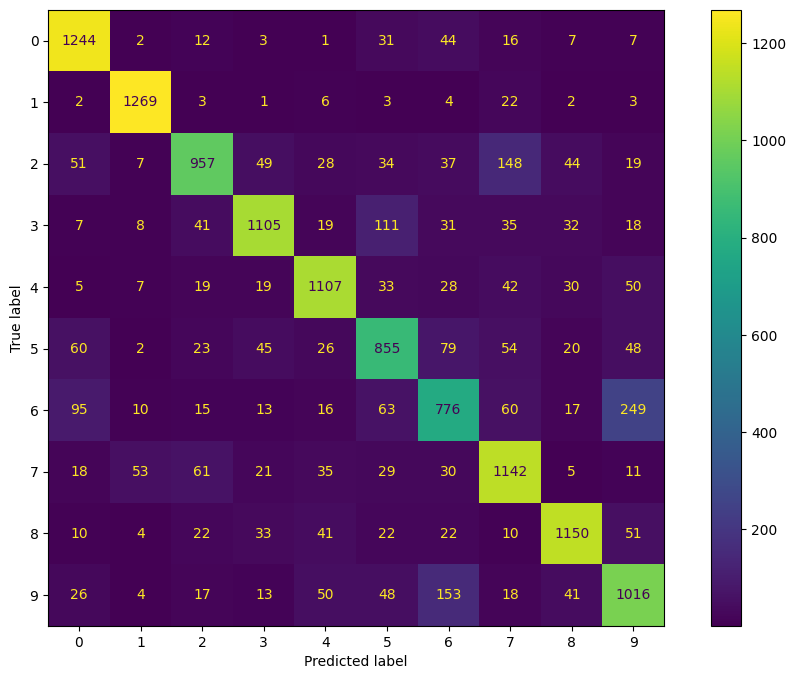

Accuracy = 78.8%
Time taken = 421.8
k =  250
422/422 [==============================] - 1s 2ms/step


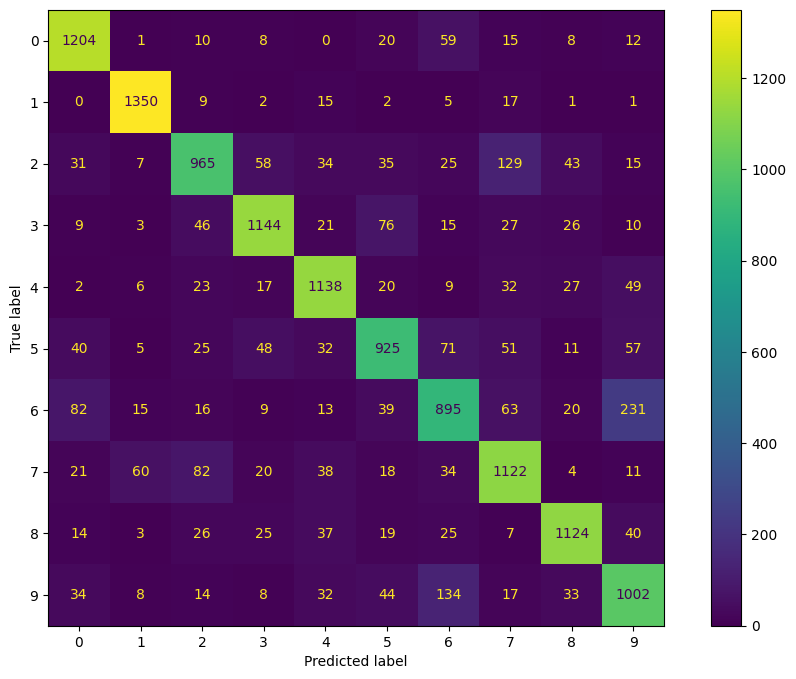

Accuracy = 80.60000000000001%
Time taken = 547.5
k =  350
422/422 [==============================] - 1s 1ms/step


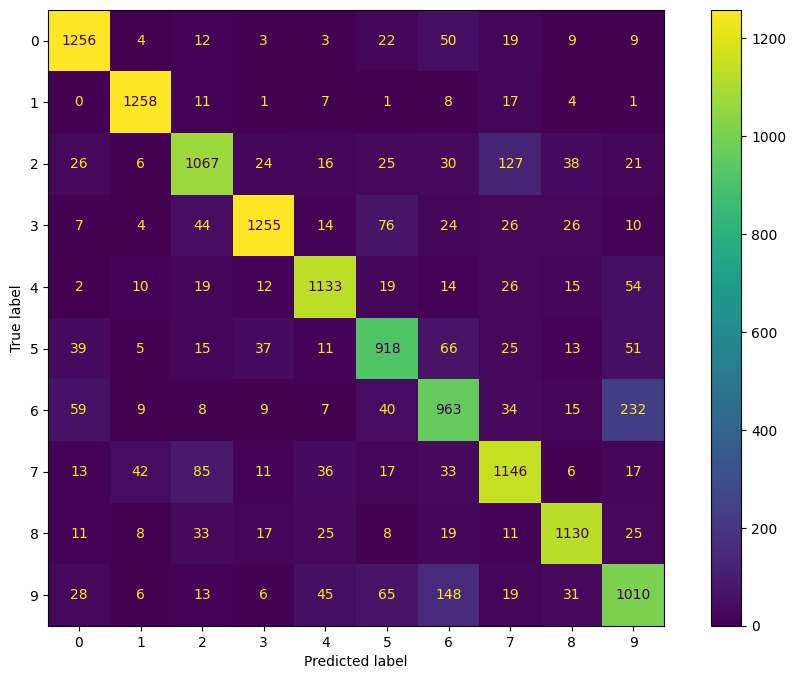

Accuracy = 82.6%
Time taken = 715.4


In [ ]:
for i in range(150,360,100):
  change_k(i)

In [ ]:
Nhận Xét: 
Hàm SIFT train lâu hơn nhiều so với hàm HOG và độ chính xác cũng thấp hơn nhiều
Mặc dù hàm SIFT tăng giá trị k lên sẽ tăng accuracy nhưng thời gian train tăng nhiều và accuracy thì tăng ít, cũng ko cao = HOG
SIFT trích xuất đặc trưng có tính bất biến với góc xoay nên nó bị nhầm nhiều giữa số 6 và số 9, còn hàm HOG thì không bị